---
# **CCUS**
---

**Resources**
* [Python Basics Cheat Sheet](https://docs.google.com/document/d/1NcIC6so-GM5t5kd-iS7HGapWmKc8WJyAQAI00gemBms/edit?usp=drive_link)

* [pandas Commands](https://docs.google.com/document/d/1pLCyzig38Mop0Iib021X47S25WBEqZCWf7LRdpC8hGw/edit?usp=drive_link)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1tCKyB_E2A-S_rwTIN6JHE9lCQiK4DLTQTt25Lc-uQcs/edit?usp=drive_link)

* [Data Wrangling Cheat Sheet](https://docs.google.com/document/d/1rQaux3Ccj7x-cDdIGfd56BszSkqQpbZ3EonMFbJxfxI/edit?usp=drive_link)

**Run the code below to import the necessary libraries.**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/MyDrive/data tcs/

/content/drive/MyDrive/data tcs


#### **Problem #0**

Read the CSV into a dataframe.

In [5]:
filename = "/content/drive/MyDrive/data tcs/Copy of CCUS_Sentiment_Analysis_Tweets_Dataset.csv"

df_ccus = pd.read_csv(filename, sep=';')

In [6]:
df_ccus.info()
df_ccus.describe()
df_ccus.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Language                                3030 non-null   object
 1   Tweet                                   3030 non-null   object
 2   Benefit                                 177 non-null    object
 3   Concern                                 193 non-null    object
 4   Perception-Fight-climate-change         224 non-null    object
 5   Perception-Climate-friendly-technology  19 non-null     object
 6   Perception-Extensive-R&D-needed         39 non-null     object
 7   Perception-Better-options-than-CCS      45 non-null     object
 8   Sentiment                               3030 non-null   object
 9   Relatedness                             203 non-null    object
 10  Comment                                 21 non-null     object
dtypes: o

np.int64(63)

In [7]:
df_ccus.isna().sum()

,0
Language,0
Tweet,0
Benefit,2853
Concern,2837
Perception-Fight-climate-change,2806
Perception-Climate-friendly-technology,3011
Perception-Extensive-R&D-needed,2991
Perception-Better-options-than-CCS,2985
Sentiment,0
Relatedness,2827


In [8]:
df_ccus['Benefit'].fillna('None', inplace=True)
df_ccus['Concern'].fillna('None', inplace=True)
df_ccus['Perception-Fight-climate-change'].fillna('No', inplace=True)
df_ccus['Perception-Climate-friendly-technology'].fillna('No', inplace=True)
df_ccus['Perception-Extensive-R&D-needed'].fillna('No', inplace=True)
df_ccus['Perception-Better-options-than-CCS'].fillna('No', inplace=True)
df_ccus['Relatedness'].fillna('None', inplace=True)
df_ccus['Comment'].fillna('None', inplace=True)

In [9]:
df_ccus.duplicated().sum()
df_ccus.isna().sum()

,0
Language,0
Tweet,0
Benefit,0
Concern,0
Perception-Fight-climate-change,0
Perception-Climate-friendly-technology,0
Perception-Extensive-R&D-needed,0
Perception-Better-options-than-CCS,0
Sentiment,0
Relatedness,0


In [25]:
df_ccus_drop = df_ccus.drop_duplicates()
df_ccus_drop.duplicated().sum()
df_ccus_drop.describe()

,Language,Tweet,Benefit,Concern,Perception-Fight-climate-change,Perception-Climate-friendly-technology,Perception-Extensive-R&D-needed,Perception-Better-options-than-CCS,Sentiment,Relatedness,Comment
count,2965,2965,2965,2965,2965,2965,2965,2965,2965,2965,2965
unique,31,2954,9,10,2,2,2,2,3,2,10
top,en,@DominikaLasota1 @c40cities @trzaskowski_ @got...,None,None,No,No,No,No,Neutral,None,None
freq,1774,2,2788,2773,2795,2961,2926,2920,2496,2769,2944


In [29]:
df_ccus_drop = df_ccus_drop[df_ccus_drop['Relatedness'] != 'Not related']

In [30]:
df_ccus_drop.describe()

,Language,Tweet,Benefit,Concern,Perception-Fight-climate-change,Perception-Climate-friendly-technology,Perception-Extensive-R&D-needed,Perception-Better-options-than-CCS,Sentiment,Relatedness,Comment
count,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769
unique,28,2761,9,10,2,2,2,2,3,1,10
top,en,"@lubian67 @GiZollino Look, I'm criticizing thi...",None,None,No,No,No,No,Neutral,None,None
freq,1673,2,2592,2577,2599,2765,2730,2724,2300,2769,2748


In [31]:
df_ccus_drop.to_csv('/content/drive/MyDrive/data tcs/ccus_clean.csv')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='Sentiment'>

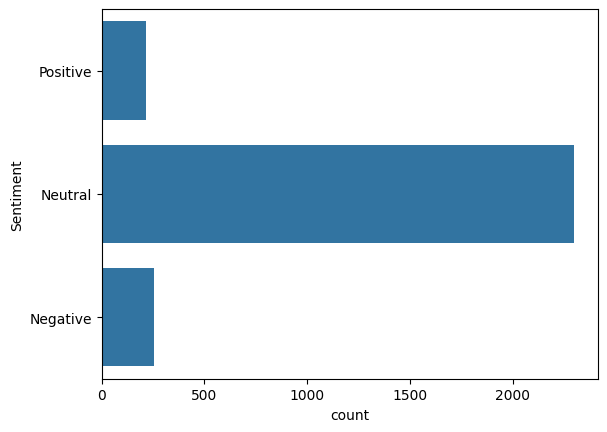

In [33]:
sns.countplot(df_ccus_drop['Sentiment'])

<Axes: xlabel='count', ylabel='Language'>

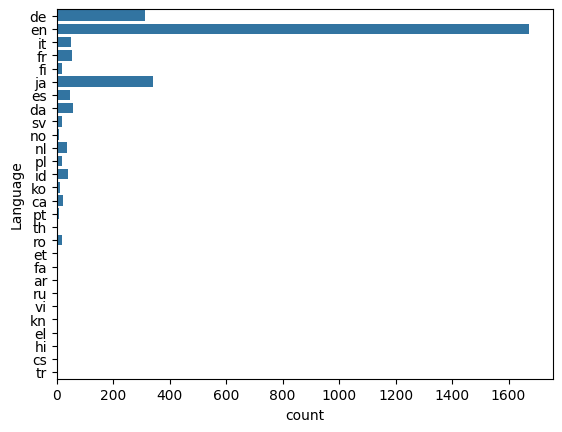

In [34]:
sns.countplot(df_ccus_drop['Language'])

In [35]:
df_ccus_drop[['Language', 'Sentiment']].head()

,Language,Sentiment
0,de,Positive
1,en,Positive
2,it,Positive
3,fr,Positive
4,fi,Positive


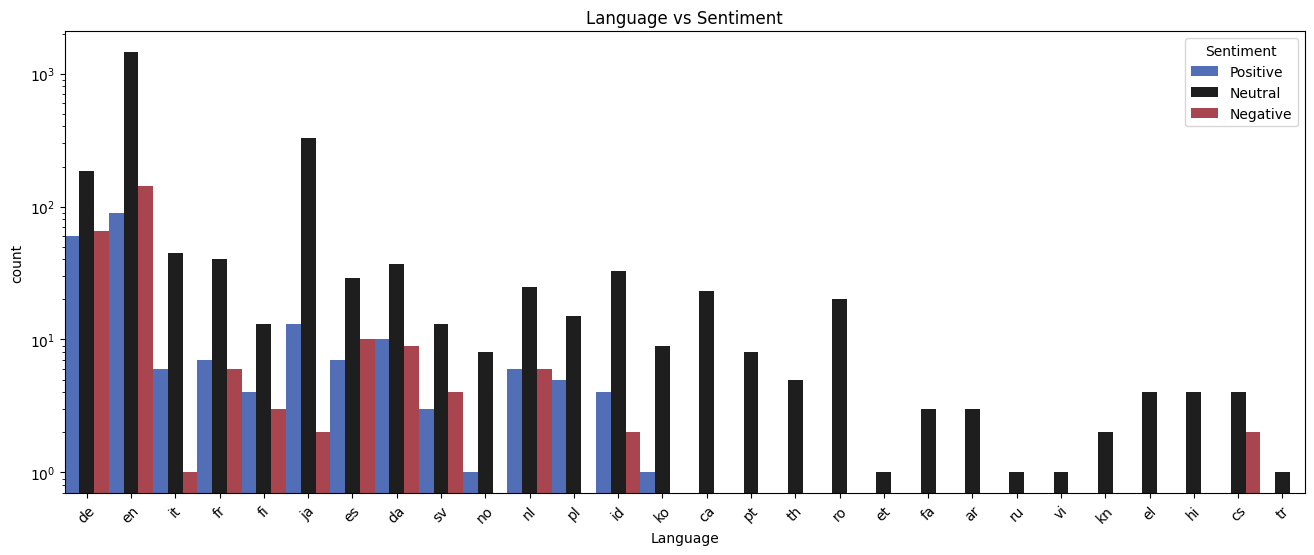

In [36]:
plt.figure(figsize=(16, 6))
ccusp = sns.countplot(x='Language', hue='Sentiment', data=df_ccus_drop, palette='icefire', width=1.0)
plt.xticks(rotation=45)
ccusp.set_yscale('log')
plt.title('Language vs Sentiment')
plt.show()

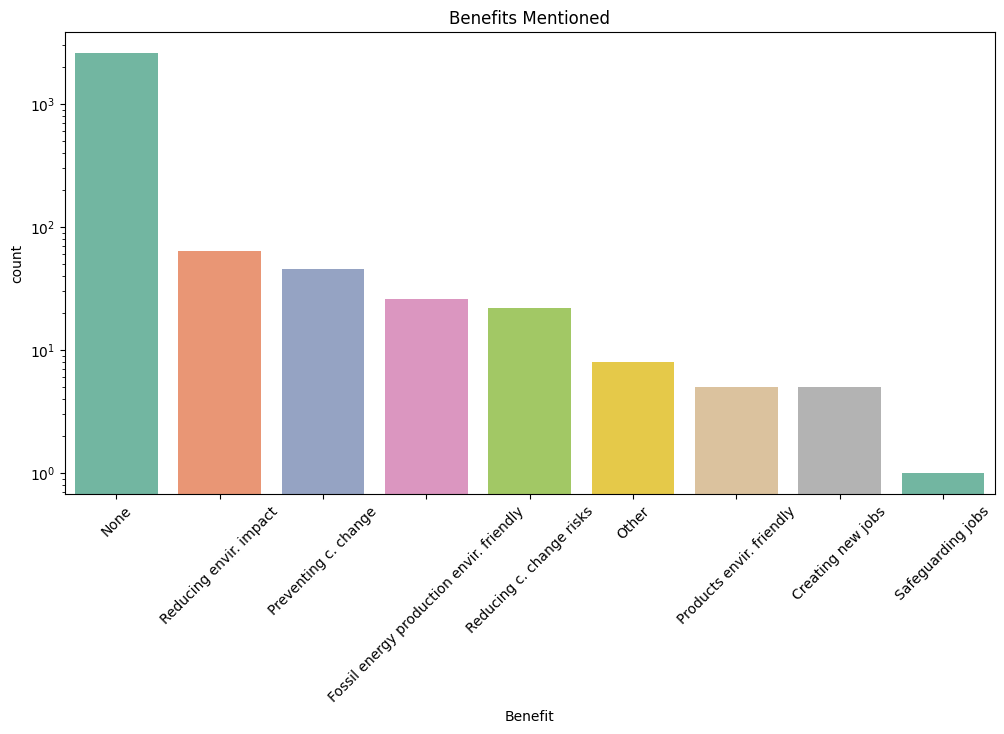

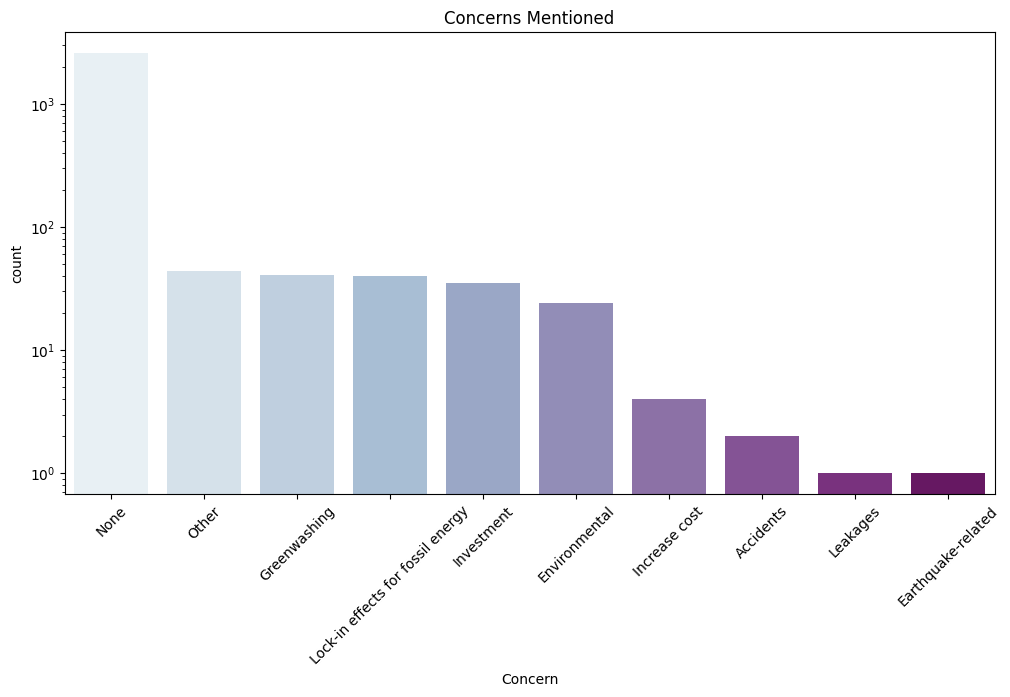

In [37]:
plt.figure(figsize=(12,6))
benefit_plot = sns.countplot(data=df_ccus_drop, x='Benefit', order=df_ccus_drop['Benefit'].value_counts().index, palette='Set2')
benefit_plot.set_yscale('log')
plt.xticks(rotation=45)
plt.title('Benefits Mentioned')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df_ccus_drop, x='Concern', order=df_ccus_drop['Concern'].value_counts().index, palette='BuPu')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Concerns Mentioned')
plt.show()

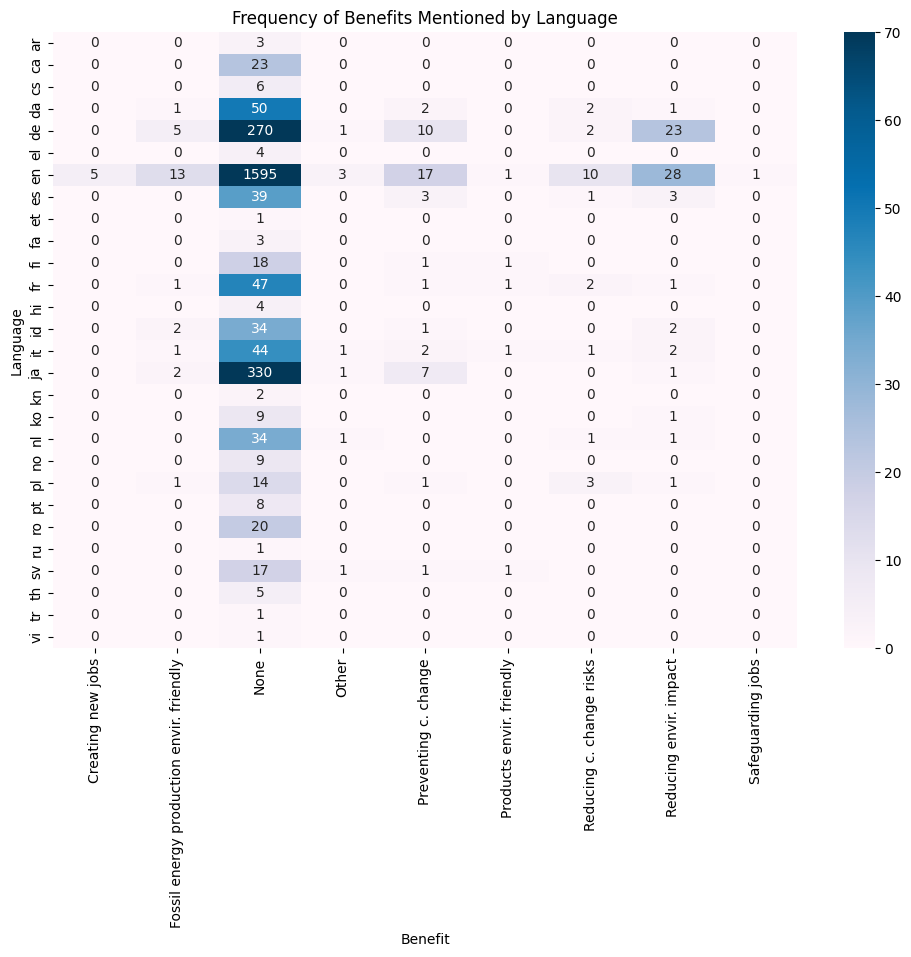

In [38]:
benefit_pivot = df_ccus_drop.pivot_table(index='Language', columns='Benefit', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(benefit_pivot, annot=True, cmap='PuBu', vmin=0, vmax=70, fmt='g')
plt.title('Frequency of Benefits Mentioned by Language')
plt.show()